# 以下每一个block依次是图2.4-图2.10的源代码（可独立运行）

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


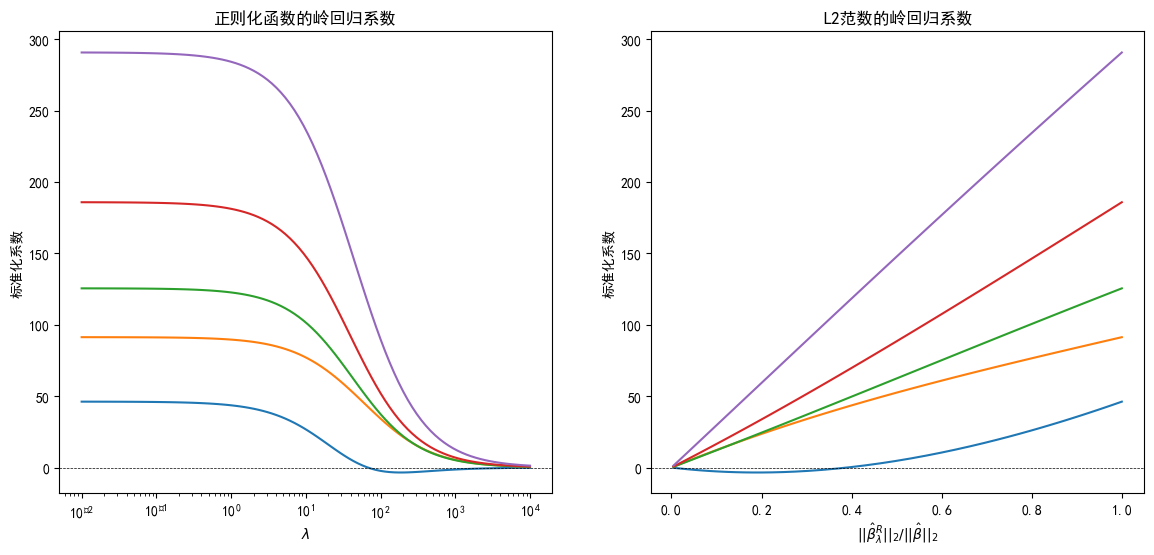

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号


# 生成示例数据
np.random.seed(42)
n_samples, n_features = 50, 5
X = np.random.randn(n_samples, n_features)
y = np.dot(X, np.array([50, 100, 150, 200, 250])) + np.random.normal(0, 0.5, n_samples)

# 定义岭回归模型的不同alpha值
alphas = np.logspace(-2, 4, 100)

coefs = []
for a in alphas:
    ridge = make_pipeline(StandardScaler(), Ridge(alpha=a))
    ridge.fit(X, y)
    coefs.append(ridge.named_steps['ridge'].coef_)

coefs = np.array(coefs)

# 绘制岭系数轨迹图
plt.figure(figsize=(14, 6))

# 左侧图: 系数随 alpha 的变化
plt.subplot(1, 2, 1)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel(r'$\lambda$')
plt.ylabel('标准化系数')
plt.title('正则化函数的岭回归系数')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axis('tight')

# 右侧图: 系数随 L2 范数的变化
l2_norm = np.linalg.norm(coefs, axis=1)
plt.subplot(1, 2, 2)
plt.plot(l2_norm / l2_norm.max(), coefs)
plt.xlabel(r'$||\hat{\beta}^R_\lambda||_2 / ||\hat{\beta}||_2$')
plt.ylabel('标准化系数')
plt.title('L2范数的岭回归系数')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axis('tight')
plt.savefig('2-4.png')
plt.show()

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


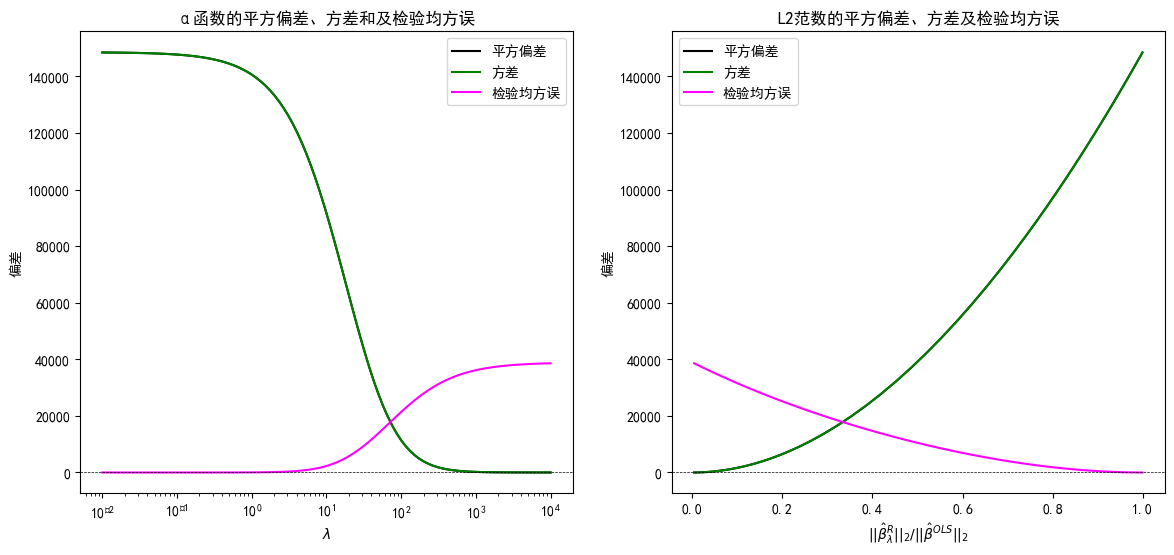

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 生成示例数据
np.random.seed(42)
n_samples, n_features = 50, 5
X = np.random.randn(n_samples, n_features)
y = np.dot(X, np.array([50, 100, 150, 200, 250])) + np.random.normal(0, 0.5, n_samples)

# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义岭回归模型的不同alpha值
alphas = np.logspace(-2, 4, 100)

# 使用线性回归作为最小二乘估计
ols = make_pipeline(StandardScaler(), LinearRegression())
ols.fit(X_train, y_train)
ols_coef_norm = np.linalg.norm(ols.named_steps['linearregression'].coef_)

bias_squared = []
variance = []
test_errors = []
norm_ratios = []

for a in alphas:
    ridge = make_pipeline(StandardScaler(), Ridge(alpha=a))
    ridge.fit(X_train, y_train)
    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)
    
    # 计算平方偏差 (Bias²)
    bias_squared.append(np.mean((y_train_pred - np.mean(y_train))**2))
    
    # 计算方差 (Variance)
    variance.append(np.var(y_train_pred))
    
    # 计算测试误差 (Test MSE)
    test_errors.append(mean_squared_error(y_test, y_test_pred))
    
    # 计算岭回归系数范数与OLS系数范数的比值
    ridge_coef_norm = np.linalg.norm(ridge.named_steps['ridge'].coef_)
    norm_ratios.append(ridge_coef_norm / ols_coef_norm)

# 绘制图像
plt.figure(figsize=(14, 6))

# 左侧图: 随 alpha 的变化
plt.subplot(1, 2, 1)
plt.plot(alphas, bias_squared, label='平方偏差', color='black')
plt.plot(alphas, variance, label='方差', color='green')
plt.plot(alphas, test_errors, label='检验均方误', color='magenta')
plt.xscale('log')
plt.xlabel(r'$\lambda$')
plt.ylabel('偏差')
plt.title('α函数的平方偏差、方差和及检验均方误')
plt.axhline(y=np.min(test_errors), color='black', linestyle='--', linewidth=0.5)
plt.legend()

# 右侧图: 随 L2 范数比值变化
plt.subplot(1, 2, 2)
plt.plot(norm_ratios, bias_squared, label='平方偏差', color='black')
plt.plot(norm_ratios, variance, label='方差', color='green')
plt.plot(norm_ratios, test_errors, label='检验均方误', color='magenta')
plt.xlabel(r'$||\hat{\beta}^R_\lambda||_2 / ||\hat{\beta}^{OLS}||_2$')
plt.ylabel('偏差')
plt.title('L2范数的平方偏差、方差及检验均方误')
plt.axhline(y=np.min(test_errors), color='black', linestyle='--', linewidth=0.5)
plt.legend()
plt.savefig('2-5.png')
plt.show()

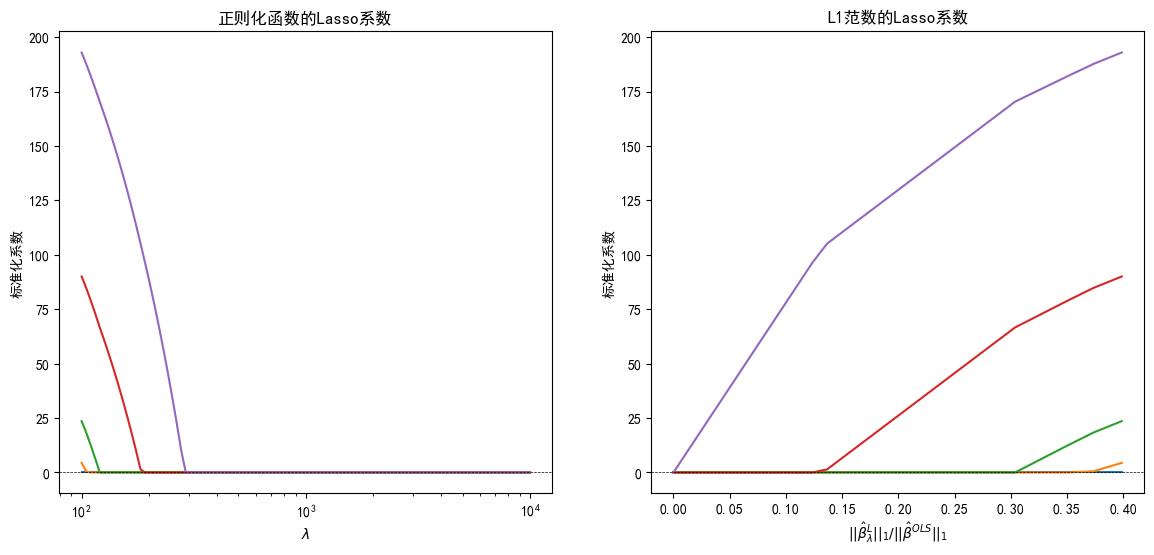

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# 生成示例数据
np.random.seed(42)
n_samples, n_features = 50, 5
X = np.random.randn(n_samples, n_features)
y = np.dot(X, np.array([50, 100, 150, 200, 250])) + np.random.normal(0, 0.5, n_samples)

# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义Lasso模型的不同alpha值
alphas = np.logspace(2, 4, 100)

# 使用线性回归作为最小二乘估计
ols = make_pipeline(StandardScaler(), LinearRegression())
ols.fit(X_train, y_train)
ols_coef_norm = np.linalg.norm(ols.named_steps['linearregression'].coef_, ord=1)

coefs = []
norm_ratios = []

for a in alphas:
    lasso = make_pipeline(StandardScaler(), Lasso(alpha=a, max_iter=10000))
    lasso.fit(X_train, y_train)
    
    lasso_coef_norm = np.linalg.norm(lasso.named_steps['lasso'].coef_, ord=1)
    norm_ratios.append(lasso_coef_norm / ols_coef_norm)
    coefs.append(lasso.named_steps['lasso'].coef_)

coefs = np.array(coefs)

# 绘制Lasso系数轨迹图
plt.figure(figsize=(14, 6))

# 左侧图: 系数随 alpha 的变化
plt.subplot(1, 2, 1)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel(r'$\lambda$')
plt.ylabel('标准化系数')
plt.title('正则化函数的Lasso系数')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axis('tight')

# 右侧图: 系数随 L1 范数的变化
plt.subplot(1, 2, 2)
plt.plot(norm_ratios, coefs)
plt.xlabel(r'$||\hat{\beta}^L_\lambda||_1 / ||\hat{\beta}^{OLS}||_1$')
plt.ylabel('标准化系数')
plt.title('L1范数的Lasso系数')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axis('tight')
plt.savefig('2-6.png')
plt.show()


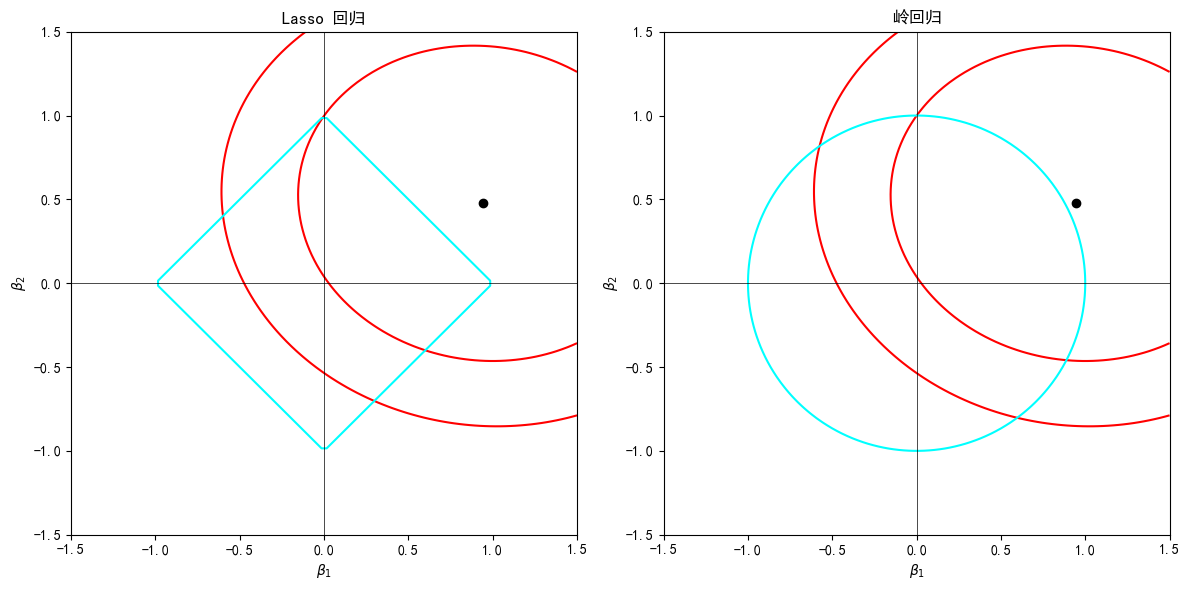

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 生成随机数据
np.random.seed(42)
n_samples = 50
X = np.random.randn(n_samples, 2)
y = np.dot(X, np.array([1, 0.5])) + np.random.randn(n_samples) * 0.5

# 定义网格范围
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))

# 定义Lasso和Ridge的约束函数
lasso_constraint = np.abs(xx) + np.abs(yy)
ridge_constraint = xx**2 + yy**2

# 定义误差的等值线（简单模拟一个误差函数）
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
error_contours = np.array([np.sum((y - X @ [xx_val, yy_val])**2) for xx_val, yy_val in zip(np.ravel(xx), np.ravel(yy))])
error_contours = error_contours.reshape(xx.shape)

# 确定与误差线相切的约束函数值
min_error = np.min(error_contours)
contour_level = min_error + 0.5 * np.std(error_contours)
levels = [contour_level - 0.5 * np.std(error_contours),
          contour_level,
          contour_level + 0.5 * np.std(error_contours)]

# 绘制图像
plt.figure(figsize=(12, 6))

# 左侧图: Lasso回归
plt.subplot(1, 2, 1)
plt.contour(xx, yy, error_contours, levels=levels, colors='red')
plt.contour(xx, yy, lasso_constraint, levels=[1], colors='cyan')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.scatter(beta_hat[0], beta_hat[1], color='black', marker='o')
plt.xlabel(r'$\beta_1$')
plt.ylabel(r'$\beta_2$')
plt.title('Lasso 回归')

# 右侧图: 岭回归
plt.subplot(1, 2, 2)
plt.contour(xx, yy, error_contours, levels=levels, colors='red')
plt.contour(xx, yy, ridge_constraint, levels=[1], colors='cyan')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.scatter(beta_hat[0], beta_hat[1], color='black', marker='o')
plt.xlabel(r'$\beta_1$')
plt.ylabel(r'$\beta_2$')
plt.title('岭回归')

plt.tight_layout()
plt.savefig('2-7.png')
plt.show()


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

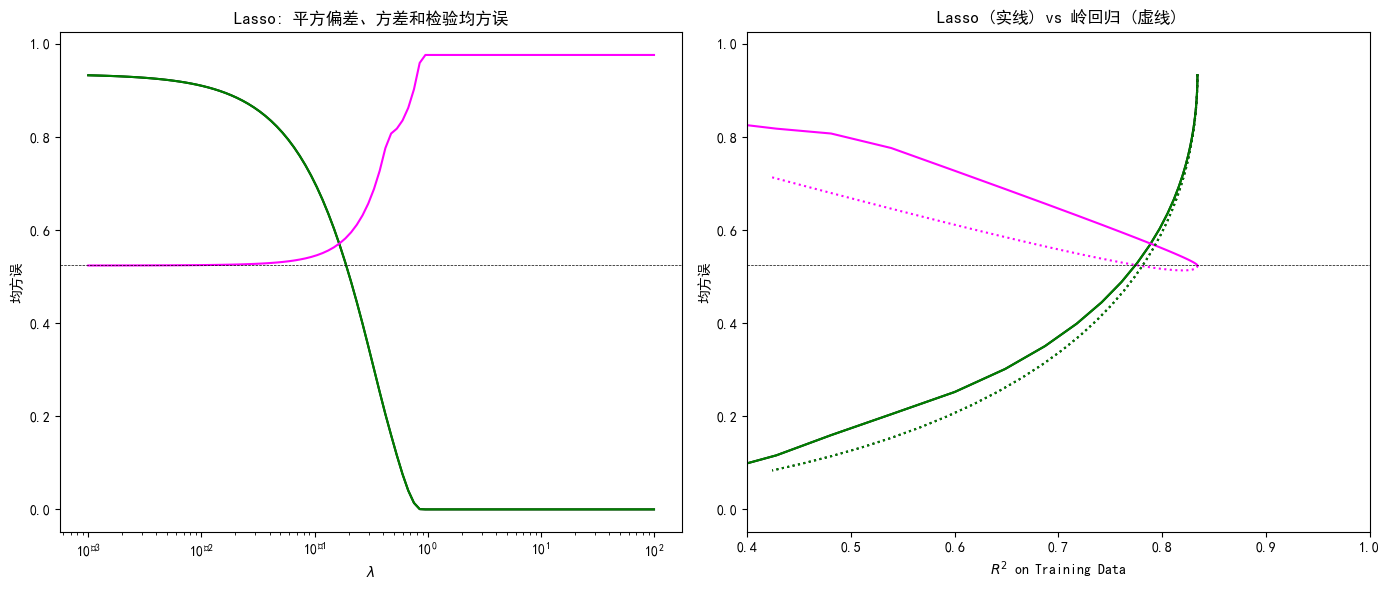

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 生成随机数据
np.random.seed(42)
n_samples, n_features = 50, 2
X = np.random.randn(n_samples, n_features)
y = np.dot(X, np.array([1, 0.5])) + np.random.randn(n_samples) * 0.5

# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义Lasso和Ridge模型的不同alpha值
alphas = np.logspace(-3, 2, 100)

# 保存误差和R²值
lasso_train_errors, lasso_test_errors = [], []
lasso_bias_squared, lasso_variance = [], []
ridge_train_errors, ridge_test_errors = [], []
ridge_bias_squared, ridge_variance = [], []
lasso_r2, ridge_r2 = [], []

for alpha in alphas:
    # Lasso回归
    lasso = make_pipeline(StandardScaler(), Lasso(alpha=alpha, max_iter=10000))
    lasso.fit(X_train, y_train)
    y_train_pred = lasso.predict(X_train)
    y_test_pred = lasso.predict(X_test)
    
    lasso_r2.append(r2_score(y_train, y_train_pred))
    lasso_bias_squared.append(np.mean((y_train_pred - np.mean(y_train))**2))
    lasso_variance.append(np.var(y_train_pred))
    lasso_train_errors.append(mean_squared_error(y_train, y_train_pred))
    lasso_test_errors.append(mean_squared_error(y_test, y_test_pred))
    
    # 岭回归
    ridge = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    ridge.fit(X_train, y_train)
    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)
    
    ridge_r2.append(r2_score(y_train, y_train_pred))
    ridge_bias_squared.append(np.mean((y_train_pred - np.mean(y_train))**2))
    ridge_variance.append(np.var(y_train_pred))
    ridge_train_errors.append(mean_squared_error(y_train, y_train_pred))
    ridge_test_errors.append(mean_squared_error(y_test, y_test_pred))

# 绘制图像
plt.figure(figsize=(14, 6))

# 左侧图: Lasso的平方偏差、方差和检验均方误差随alpha变化的图
plt.subplot(1, 2, 1)
plt.plot(alphas, lasso_bias_squared, label='Bias Squared', color='black')
plt.plot(alphas, lasso_variance, label='Variance', color='green')
plt.plot(alphas, lasso_test_errors, label='Test MSE', color='magenta')
plt.xscale('log')
plt.xlabel(r'$\lambda$')
plt.ylabel('均方误')
plt.title('Lasso: 平方偏差、方差和检验均方误')
plt.axhline(y=np.min(lasso_test_errors), color='black', linestyle='--', linewidth=0.5, label='Min Test MSE')

# 右侧图: Lasso和Ridge的平方偏差、方差和检验均方误差随R²的比较图
plt.subplot(1, 2, 2)
plt.plot(lasso_r2, lasso_bias_squared, label='Bias Squared', color='black', linestyle='-')
plt.plot(lasso_r2, lasso_variance, label='Variance', color='green', linestyle='-')
plt.plot(lasso_r2, lasso_test_errors, label='Test MSE', color='magenta', linestyle='-')
plt.plot(ridge_r2, ridge_bias_squared, color='black', linestyle=':')
plt.plot(ridge_r2, ridge_variance, color='green', linestyle=':')
plt.plot(ridge_r2, ridge_test_errors, color='magenta', linestyle=':')
plt.xlabel(r'$R^2$ on Training Data')
plt.ylabel('均方误')
plt.title('Lasso (实线) vs 岭回归 (虚线)')
plt.axhline(y=np.min(lasso_test_errors), color='black', linestyle='--', linewidth=0.5, label='Min Test MSE')
plt.xlim(0.4, 1.0)  # 将横坐标的范围设置为从0.4到1.0

plt.tight_layout()
plt.savefig('2-8.png')
plt.show()


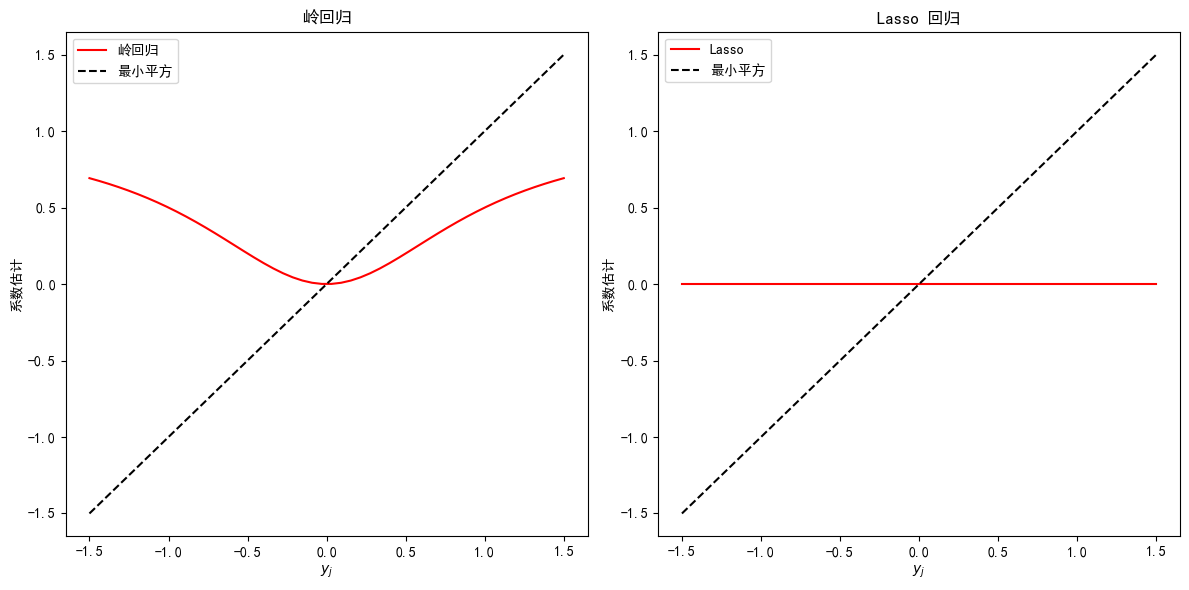

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso

# 设置随机种子以便复现
np.random.seed(42)

# 定义n = p的情况，并创建对角矩阵X
n = 50  # 样本数和特征数相同
X = np.diag(np.linspace(-1.5, 1.5, n))  # 对角矩阵
y = np.linspace(-1.5, 1.5, n)  # y的值为对角线上的值

# 最小二乘法系数估计
least_squares_coef = y  # 因为X是对角矩阵，最小二乘法的系数估计直接为y

# 岭回归
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)
ridge_coef = ridge.coef_

# Lasso回归
lasso = Lasso(alpha=0.5)
lasso.fit(X, y)
lasso_coef = lasso.coef_

# 绘制图像
plt.figure(figsize=(12, 6))

# 左侧图: 岭回归
plt.subplot(1, 2, 1)
plt.plot(y, ridge_coef, label='岭回归', color='red')
plt.plot(y, least_squares_coef, label='最小平方', color='black', linestyle='--')
plt.xlabel(r'$y_j$')
plt.ylabel('系数估计')
plt.title('岭回归')
plt.legend()

# 右侧图: Lasso回归
plt.subplot(1, 2, 2)
plt.plot(y, lasso_coef, label='Lasso', color='red')
plt.plot(y, least_squares_coef, label='最小平方', color='black', linestyle='--')
plt.xlabel(r'$y_j$')
plt.ylabel('系数估计')
plt.title('Lasso 回归')
plt.legend()

plt.tight_layout()
plt.savefig('2-9.png')
plt.show()


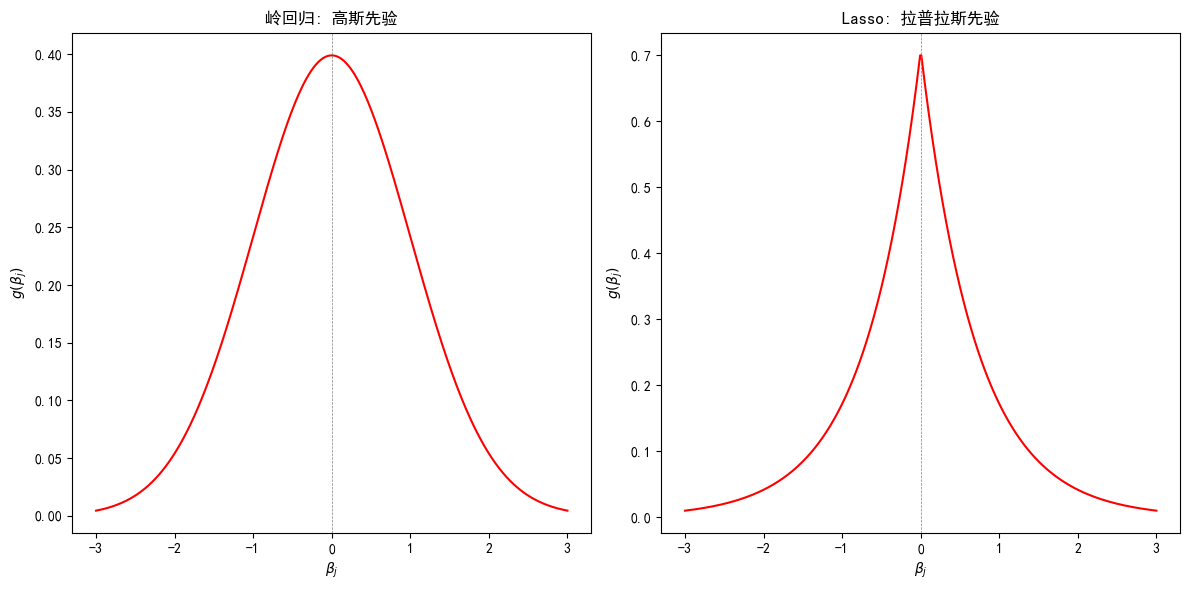

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, laplace

# 定义β的值域
beta_values = np.linspace(-3, 3, 400)

# 高斯分布（对应于岭回归的先验分布）
gaussian_prior = norm.pdf(beta_values, loc=0, scale=1)

# 拉普拉斯分布（对应于Lasso回归的先验分布）
laplace_prior = laplace.pdf(beta_values, loc=0, scale=1/np.sqrt(2))

# 绘制图像
plt.figure(figsize=(12, 6))

# 左侧图: 岭回归的高斯先验
plt.subplot(1, 2, 1)
plt.plot(beta_values, gaussian_prior, color='red')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel(r'$\beta_j$')
plt.ylabel(r'$g(\beta_j)$')
plt.title('岭回归: 高斯先验')

# 右侧图: Lasso的拉普拉斯先验
plt.subplot(1, 2, 2)
plt.plot(beta_values, laplace_prior, color='red')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel(r'$\beta_j$')
plt.ylabel(r'$g(\beta_j)$')
plt.title('Lasso: 拉普拉斯先验')

plt.tight_layout()
plt.savefig('2-10.png')
plt.show()
